# Assignment 8 : Xarray

** Due Thursday, Nov. 26 **

In this assignment, we will use Xarray to analyze top-of-atmosphere radiation data from [NASA's CERES project](https://eosweb.larc.nasa.gov/project/ceres/ceres_table).

![radiation budget](https://upload.wikimedia.org/wikipedia/commons/b/bb/The-NASA-Earth%27s-Energy-Budget-Poster-Radiant-Energy-System-satellite-infrared-radiation-fluxes.jpg)
_Public domain, by NASA, from Wikimedia Commons_

I have pre-downloaded and subsetted a portion of this dataset for use in our class. You can download it here:
http://ldeo.columbia.edu/~rpa/CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc. The size of the data file is 702.53 MB. It will take a minute or two to download.

Considering reviewing the [FAQs](https://eosweb.larc.nasa.gov/faq-page/ceres-faq#t67n120) for this dataset before getting started.

Start by importing xarray, numpy, and matplotlib

In [47]:
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline


## 1.1) Open the dataset and explore its contents using `print` and `.info()`


In [49]:
import netCDF4
data=xarray.open_dataset('CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc')
data.info()

xarray.Dataset {
dimensions:
	lat = 180 ;
	lon = 360 ;
	time = 203 ;

variables:
	float32 lon(lon) ;
		lon:long_name = longitude ;
		lon:standard_name = longitude ;
		lon:units = degrees_east ;
		lon:valid_range = [   0.  360.] ;
	float64 toa_sw_all_mon(time, lat, lon) ;
		toa_sw_all_mon:long_name = Top of The Atmosphere Shortwave Flux, Monthly Means, All-Sky conditions ;
		toa_sw_all_mon:standard_name = TOA Shortwave Flux - All-Sky ;
		toa_sw_all_mon:CF_name = toa_outgoing_shortwave_flux ;
		toa_sw_all_mon:units = W m-2 ;
		toa_sw_all_mon:valid_min =       0.00000 ;
		toa_sw_all_mon:valid_max =       600.000 ;
	float64 toa_lw_all_mon(time, lat, lon) ;
		toa_lw_all_mon:long_name = Top of The Atmosphere Longwave Flux, Monthly Means, All-Sky conditions ;
		toa_lw_all_mon:standard_name = TOA Longwave Flux - All-Sky ;
		toa_lw_all_mon:CF_name = toa_outgoing_longwave_flux ;
		toa_lw_all_mon:units = W m-2 ;
		toa_lw_all_mon:valid_min =       0.00000 ;
		toa_lw_all_mon:valid_max =       400.0

## 1.2) Print out the `long_name` attribute of each variable

In [125]:
data.variables


Frozen(OrderedDict([('lon', <xarray.IndexVariable 'lon' (lon: 360)>
array([   0.5,    1.5,    2.5, ...,  357.5,  358.5,  359.5], dtype=float32)
Attributes:
    long_name:      longitude
    standard_name:  longitude
    units:          degrees_east
    valid_range:    [   0.  360.]), ('toa_sw_all_mon', <xarray.Variable (time: 203, lat: 180, lon: 360)>
array([[[  4.385000e+01,   4.385000e+01, ...,   4.385000e+01,   4.385000e+01],
        [  4.366000e+01,   4.366000e+01, ...,   4.366000e+01,   4.366000e+01],
        ..., 
        [  1.694000e+01,   1.694000e+01, ...,   1.694000e+01,   1.694000e+01],
        [  1.778000e+01,   1.778000e+01, ...,   1.778000e+01,   1.778000e+01]],

       [[  1.620000e-01,   1.620000e-01, ...,   1.620000e-01,   1.620000e-01],
        [  1.800000e-01,   1.800000e-01, ...,   1.800000e-01,   1.800000e-01],
        ..., 
        [  1.488000e+02,   1.488000e+02, ...,   1.488000e+02,   1.488000e+02],
        [  1.501000e+02,   1.501000e+02, ...,   1.501000e+02,  

## 2.1) Calculate the time-mean of the entire dataset

In [97]:
t = data.mean(dim='time')
t

<xarray.Dataset>
Dimensions:                      (lat: 180, lon: 360)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 3.5 4.5 5.5 6.5 ...
  * lat                          (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ...
Data variables:
    toa_sw_all_mon               (lat, lon) float64 122.3 122.3 122.3 122.3 ...
    toa_lw_all_mon               (lat, lon) float64 141.1 141.1 141.1 141.1 ...
    toa_net_all_mon              (lat, lon) float64 -91.29 -91.29 -91.29 ...
    toa_sw_clr_mon               (lat, lon) float64 119.9 119.9 119.9 119.9 ...
    toa_lw_clr_mon               (lat, lon) float64 140.2 140.2 140.2 140.2 ...
    toa_net_clr_mon              (lat, lon) float64 -88.03 -88.03 -88.03 ...
    toa_cre_sw_mon               (lat, lon) float64 -2.331 -2.33 -2.331 ...
    toa_cre_lw_mon               (lat, lon) float64 -0.9217 -0.9217 -0.9217 ...
    toa_cre_net_mon              (lat, lon) float64 -3.253 -3.251 -3.252 ...
    solar_mon                    

## 2.2) From this, make a 2D plot of the the time-mean TOA longwave, shortwave, and solar radiation
(All-Sky conditions)

Note the sign conventions on each variable.

Text(0.5,1,'sw')

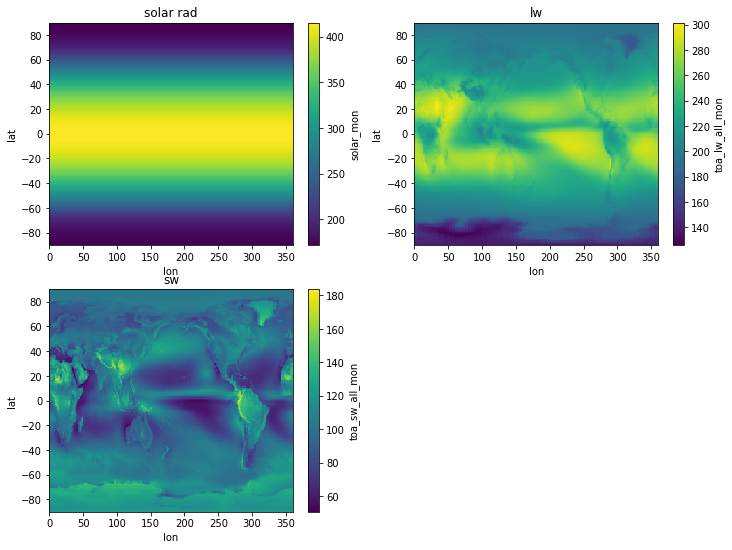

In [317]:
plt.figure(figsize=(12,9))
plt.subplot(2,2,1)
t.solar_mon.plot()
plt.title('solar rad')
plt.subplot(2,2,2)
t.toa_lw_all_mon.plot()
plt.title('lw')
plt.subplot(2,2,3)
t.toa_sw_all_mon.plot()
plt.title('sw')

## 2.3) Add up the three variables above and verify (visually) that they are equivalent to the TOA net flux

Again, you have to pay attention to and think about the sign conventions for each variable in order to get this to work.

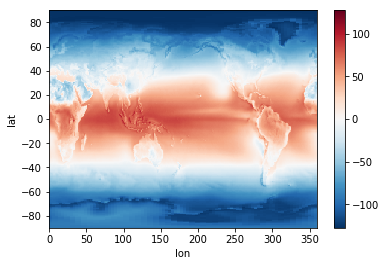

In [122]:
b=(-t.toa_sw_all_mon)+(-t.toa_lw_all_mon)+t.solar_mon
b.plot()

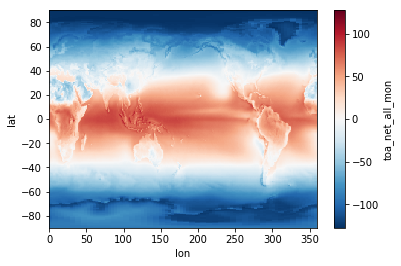

In [120]:
t.toa_net_all_mon.plot() 

## 3.1) Calculate the global mean of TOA net radiation directly from the dataset

Since the Earth is approximately in radiative balance, the net TOA radiation should be zero. But taking the naive mean from this dataset, you should find a number far from zero. Why?

In [113]:
np.mean(t.toa_net_all_mon )

<xarray.DataArray 'toa_net_all_mon' ()>
array(-28.72901222901859)

The answer is that each "pixel" or "grid point" of this dataset does not represent an equal area of Earth's surface. So naively taking the mean, i.e. giving equal weight to each point, gives the wrong answer.

On a lat / lon grid, the relative area of each grid point is proportional to $\cos(\lambda)$. ($\lambda$ is latitude)

## 3.2) Create a `weight` array proportional to $\cos(\lambda)$ with a mean value of 1

Verify its mean is 1 and plot it. Be careful about radians vs. degrees.

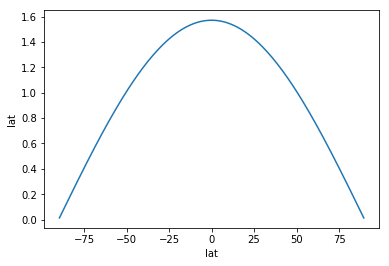

In [164]:
lat = data.lat
weights=np.cos(np.pi/180*lat)*np.pi/2
np.mean(weights)
weights.plot()

## 3.3) Redo your global mean TOA net radiation calculation with this weight factor

Remember Xarray's [handling of broadcasting](http://xarray.pydata.org/en/stable/computation.html#broadcasting-by-dimension-name). Don't make this harder than it needs to be.

In [165]:
np.mean(t.toa_net_all_mon*weights)

<xarray.DataArray ()>
array(0.8781005358208775)

This time around, you should have found something much closer to zero. Ask a climate scientist what the net energy imbalance of Earth due to global warming is estimate to be. Do you think our calculation is precise enough to detect this? 

## 3.4) Now that you have a `weight` factor, verify that the TOA incoming solar, outgoing longwave, and outgoing shortwave approximately match up with the cartoon above

In [169]:
print(np.mean(t.solar_mon*weights))
print(np.mean(t.toa_lw_all_mon *weights))
print(np.mean(t.toa_sw_all_mon *weights))



<xarray.DataArray ()>
array(340.28945771677303)
<xarray.DataArray ()>
array(240.27104565116784)
<xarray.DataArray ()>
array(99.14030491755787)


We can go beyond a weight factor and actually calculate the area of each pixel of the dataset, using the formula

$$ dA = R^2 \cos(\lambda) d\lambda d \varphi $$

where $d\lambda$ and $d\varphi$ are the spacing of the points in latitude and longitude (measured in radians). We can approximate Earth's radius as $R = 6,371$ km.

## 4.1) calculate the pixel area using this formula and create a 2D (lon, lat) DataArray for it

(Xarray's `ones_like` function can help you easily create and broadcast DataArrays.) Verify that the sum of all the pixels equals the Earth's true surface area as evaluated using the formula for the area of a sphere (yes, I know the Earth is not a sphere...it's just a homework problem).

In [218]:
lon=data.lon
R2=6731*6731
latcos=np.cos(np.pi/180*lat)*np.pi/2
dlambda=np.pi/180
dpsi=np.pi/180
da= R2*latcos*dlambda*dpsi

weightda=xarray.ones_like(t.toa_sw_all_mon)*da


4.2) Calculate and plot the total amount of net radiation in each 1-degree latitude band

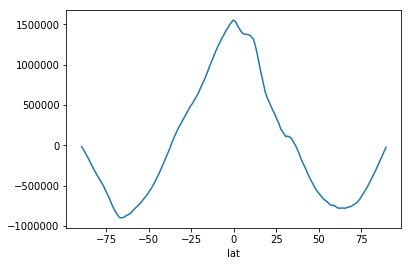

In [272]:
netrad = t.toa_net_all_mon*weightda
netrad=netrad.mean(dim='lon')
netrad.plot()


## 4.3) Plot the cumulatuve sum in latitude of that quantity

Label with correct units. (Hint: check out xarray's [cumsum](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.cumsum.html) function.)

This curve tells you how much energy must be transported meridionally by the ocean and atmosphere in order to account for the radiative imbalance at the top of the atmosphere.

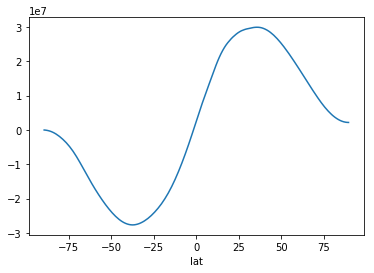

In [239]:
netrad = t.toa_net_all_mon*weightda
netrad=netrad.cumsum(dim='lat')
netrad = netrad.mean(dim='lon')
netrad.plot()


You should get a curve tht looks something like this

![meridional energy transport](http://www.cgd.ucar.edu/cas/papers/jclim2001a/Fig7.gif)

## 5.1) Plot the time-mean cloud area fraction (day and night)

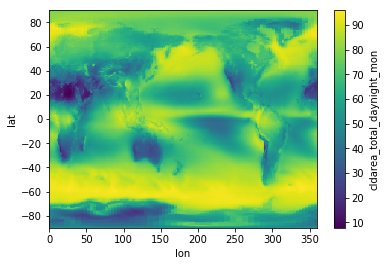

In [241]:
t.cldarea_total_daynight_mon.plot()

## 5.2) Define boolean masks for low cloud area ($\le$ 25%) and high cloud area ($\ge$ 75%)

Use the whole dataset, not the time mean.

In [300]:
cld=data.cldarea_total_daynight_mon
low=cld.where(cld <= (25)).notnull()
high=cld.where(cld >= (75)).notnull()


## 5.3) Calculate and plot composites of time-mean outgoing shortwave and longwave radiation for low and high cloud area regions

Your results should be 2D maps.

Xarray's [where](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.where.html) function will be helpful.

Text(0.5,1,'LW LOW-CLOUD')

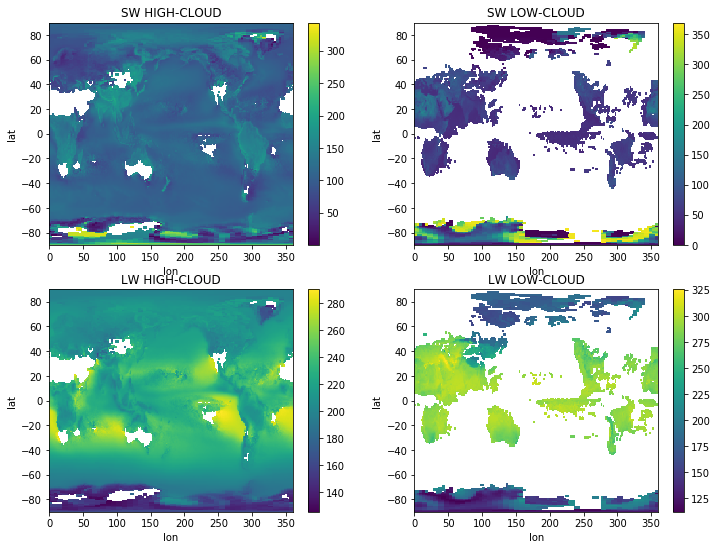

In [312]:
plt.figure(figsize=(12,9))
sw=data.toa_sw_all_mon
sw=sw.where((high))
plt.subplot(2,2,1)
sw.mean(dim='time').plot()
plt.title('SW HIGH-CLOUD')
plt.subplot(2,2,2)
sw=data.toa_sw_all_mon
sw=sw.where((low))
sw.mean(dim='time').plot()
plt.title('SW LOW-CLOUD')
plt.subplot(2,2,3)
sw=data.toa_lw_all_mon
sw=sw.where((high))
sw.mean(dim='time').plot()
plt.title('LW HIGH-CLOUD')
plt.subplot(2,2,4)
sw=data.toa_lw_all_mon
sw=sw.where((low))
sw.mean(dim='time').plot()
plt.title('LW LOW-CLOUD')



## 5.4) Using the `weight` factor from 3.2, calculate the global mean values of shortwave and longwave radiation, composited in high and low cloud regions

What is the overall effect of clouds on shortwave and longwave radiation?

In [332]:
sw=data.toa_sw_all_mon
sw=sw.where((high))*weights
print('sw high',sw.mean())

lw=data.toa_sw_all_mon
sw=sw.where((low))*weights
print('sw low',sw.mean())

sw=data.toa_lw_all_mon
sw=sw.where((high))*weights
print('lw high',sw.mean())

lw=data.toa_lw_all_mon
sw=sw.where((low))*weights
print('lw low',sw.mean())




sw high <xarray.DataArray ()>
array(107.1838691334742)
sw low <xarray.DataArray ()>
array(nan)
lw high <xarray.DataArray ()>
array(211.0564942781049)
lw low <xarray.DataArray ()>
array(nan)


## 6.1) Create a new dataset with the monthly seasonal cycle removed


Frozen(OrderedDict([('lon', <xarray.IndexVariable 'lon' (lon: 360)>
array([   0.5,    1.5,    2.5, ...,  357.5,  358.5,  359.5], dtype=float32)
Attributes:
    long_name:      longitude
    standard_name:  longitude
    units:          degrees_east
    valid_range:    [   0.  360.]), ('toa_sw_all_mon', <xarray.Variable (time: 203, lat: 180, lon: 360)>
array([[[  4.385000e+01,   4.385000e+01, ...,   4.385000e+01,   4.385000e+01],
        [  4.366000e+01,   4.366000e+01, ...,   4.366000e+01,   4.366000e+01],
        ..., 
        [  1.694000e+01,   1.694000e+01, ...,   1.694000e+01,   1.694000e+01],
        [  1.778000e+01,   1.778000e+01, ...,   1.778000e+01,   1.778000e+01]],

       [[  1.620000e-01,   1.620000e-01, ...,   1.620000e-01,   1.620000e-01],
        [  1.800000e-01,   1.800000e-01, ...,   1.800000e-01,   1.800000e-01],
        ..., 
        [  1.488000e+02,   1.488000e+02, ...,   1.488000e+02,   1.488000e+02],
        [  1.501000e+02,   1.501000e+02, ...,   1.501000e+02,  

## 6.2) Load the NINO3.4 index data we calculated and output during class and add it as a coordinate variable to the anomaly dataset

## 6.3) Calculate and plot the mean difference in net radiation between El Nino and La Nina periods